C:\Users\hp\AppData\Local\Temp\ipykernel_15276\3501735774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_viz.rename(columns={


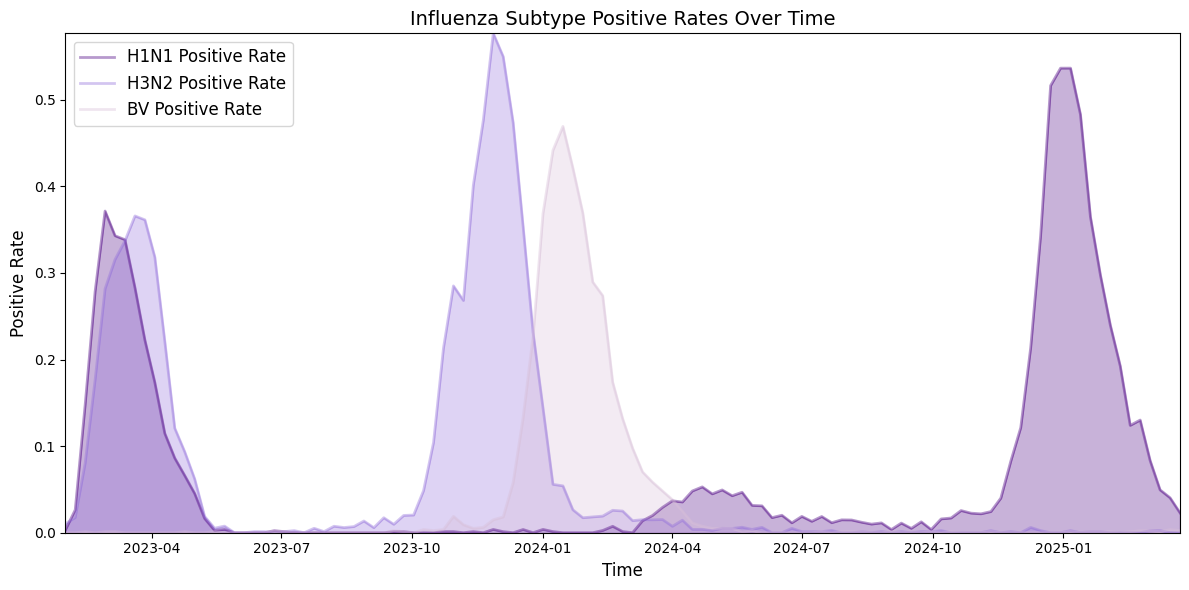

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = './data/newdata/variant.xlsx'  
data = pd.ExcelFile(file_path)
sheet2_data = data.parse('Sheet1')
sheet2_data['起始日期'] = pd.to_datetime(sheet2_data['起始日期'])  
data_for_viz = sheet2_data[['起始日期', '甲型H1N1阳性率', '甲型 H3N2阳性率', '乙型BV阳性率']]
data_for_viz.rename(columns={
    '甲型H1N1阳性率': 'H1N1 Positive Rate',
    '甲型 H3N2阳性率': 'H3N2 Positive Rate',
    '乙型BV阳性率': 'BV Positive Rate'
}, inplace=True)

data_for_viz.set_index('起始日期', inplace=True)
colors = ['#4B0082', '#9370DB', '#D8BFD8']  
alpha = 0.3  
plt.figure(figsize=(12, 6))


for idx, column in enumerate(data_for_viz.columns):
    plt.plot(data_for_viz.index, data_for_viz[column], label=column, color=colors[idx], linewidth=2 ,alpha=0.4)
    plt.fill_between(data_for_viz.index, 0, data_for_viz[column], color=colors[idx], alpha=alpha)


plt.title('Influenza Subtype Positive Rates Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Positive Rate', fontsize=12)


plt.legend(fontsize=12)

plt.margins(0)
plt.tight_layout()
plt.show()
